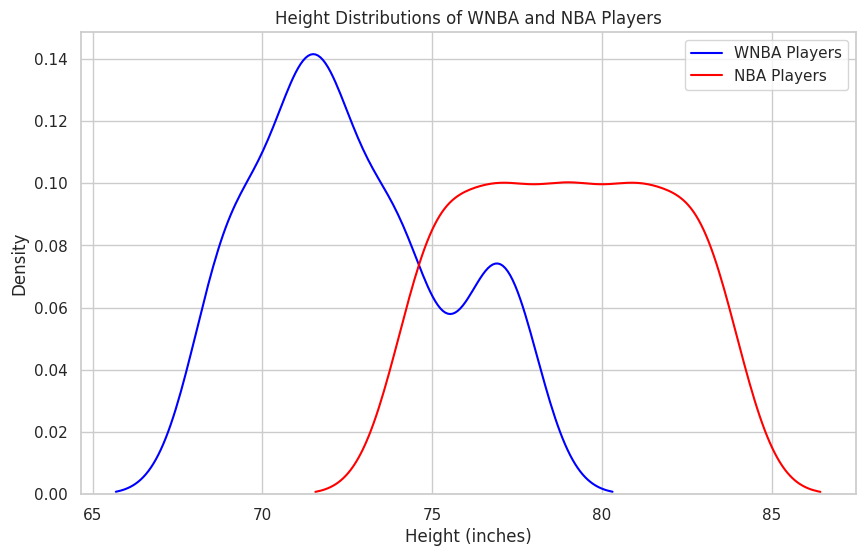

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Heights data for WNBA players by position
# Data source: Critical Body (https://criticalbody.com)
# Heights are converted to inches for consistency
wnba_heights = {
    'Point Guard': 5*12 + 9,  # 5'9" = 69 inches
    'Shooting Guard': 5*12 + 11,  # 5'11" = 71 inches
    'Small Forward': 6*12,  # 6'0" = 72 inches
    'Power Forward': 6*12 + 2,  # 6'2" = 74 inches
    'Center': 6*12 + 5  # 6'5" = 77 inches
}

# Heights data for NBA players by position
# Data source: Hoop Dojo (https://hoopdojo.com)
# Heights are converted to inches for consistency
nba_heights = {
    'Point Guard': 6*12 + 3,  # 6'3" = 75 inches
    'Shooting Guard': 6*12 + 5,  # 6'5" = 77 inches
    'Small Forward': 6*12 + 7,  # 6'7" = 79 inches
    'Power Forward': 6*12 + 9,  # 6'9" = 81 inches
    'Center': 6*12 + 11  # 6'11" = 83 inches
}

# Convert the heights dictionary values to numpy arrays for plotting
# This will help in generating the Kernel Density Estimate (KDE) plots
wnba_heights_array = np.array(list(wnba_heights.values()))
nba_heights_array = np.array(list(nba_heights.values()))

# Setting up the plot style using seaborn for better aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the KDE (Kernel Density Estimate) for WNBA heights
# The bw_adjust parameter controls the smoothness of the KDE curve
# A lower bw_adjust value makes the curve smoother
sns.kdeplot(wnba_heights_array, label='WNBA Players', bw_adjust=0.5, color='blue')

# Plotting the KDE for NBA heights
# Using a different color (red) to distinguish between the two distributions
sns.kdeplot(nba_heights_array, label='NBA Players', bw_adjust=0.5, color='red')

# Adding labels and title to the plot
plt.title('Height Distributions of WNBA and NBA Players')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()  # Adding a legend to differentiate between WNBA and NBA curves

# Displaying the plot
plt.show()


In [3]:
pip install pandas requests beautifulsoup4


Available table IDs for URL https://www.basketball-reference.com/wnba/years/2023_per_game.html : ['per_game']
Available table IDs for URL https://www.basketball-reference.com/leagues/NBA_2023_per_game.html : ['per_game_stats']
WNBA data columns: Index(['Player', 'Team', 'Pos', 'G', 'MP', 'G.1', 'GS', 'MP.1', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
NBA data columns: Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
First few rows of WNBA data before conversion:
Empty DataFrame
Columns: [Player, FG%, FT%, 3P%]
Index: []
First few rows of WNBA data after conversion:
Empty DataFrame
Columns: [Player, FG%, FT%, 3P%]
Index: []
First few rows of NBA data before conversi

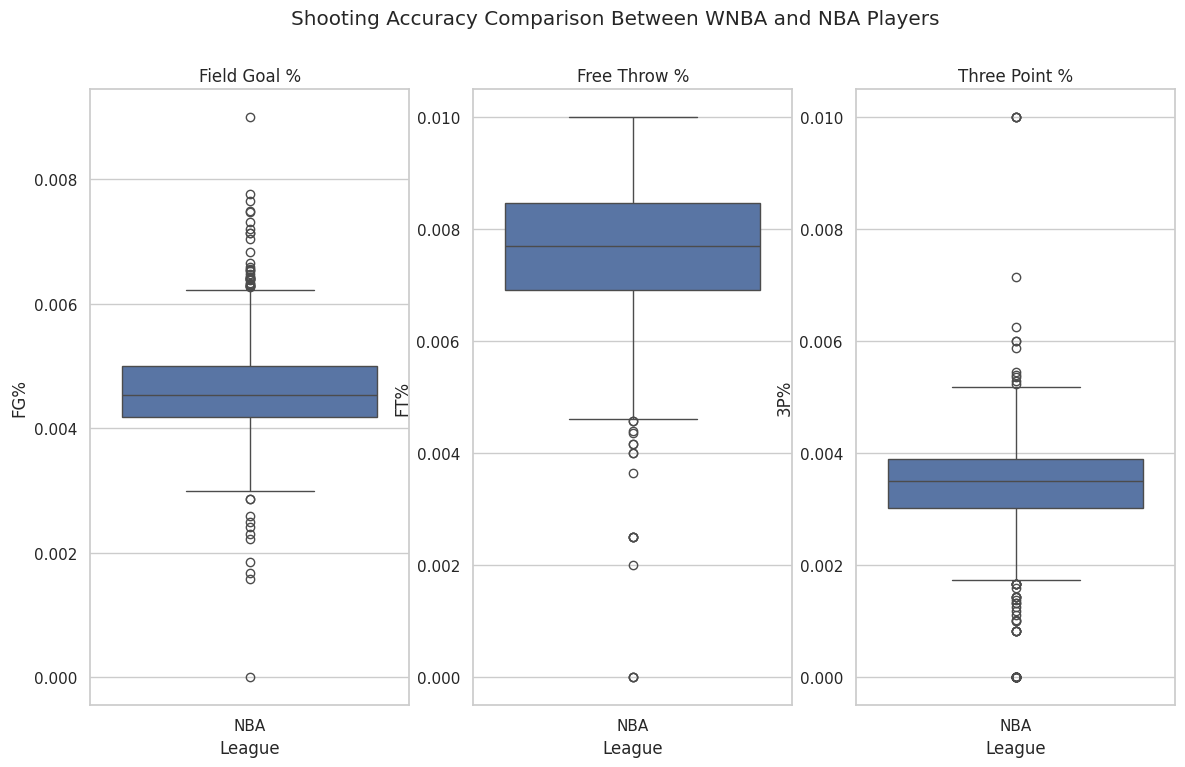

Field Goal % T-test: TtestResult(statistic=nan, pvalue=nan, df=nan)
Free Throw % T-test: TtestResult(statistic=nan, pvalue=nan, df=nan)
Three Point % T-test: TtestResult(statistic=nan, pvalue=nan, df=nan)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
from bs4 import BeautifulSoup

# Function to scrape player statistics from Basketball Reference
def scrape_basketball_reference(url, table_id):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Debug: print all available table IDs
    available_tables = [tbl.get('id') for tbl in soup.find_all('table')]
    print("Available table IDs for URL", url, ":", available_tables)

    # Find the table with the specified ID
    table = soup.find('table', {'id': table_id})
    if table is not None:
        df = pd.read_html(str(table))[0]
        return df

    print(f"No matching table found for the URL: {url}")
    return pd.DataFrame()

# URLs for WNBA and NBA player statistics from Basketball Reference
wnba_url = "https://www.basketball-reference.com/wnba/years/2023_per_game.html"
nba_url = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"

# Table IDs to look for
wnba_table_id = "per_game"
nba_table_id = "per_game_stats"

# Scraping data
wnba_data = scrape_basketball_reference(wnba_url, wnba_table_id)
nba_data = scrape_basketball_reference(nba_url, nba_table_id)

# Debug: print column names of the scraped data
print("WNBA data columns:", wnba_data.columns)
print("NBA data columns:", nba_data.columns)

# Check if data was scraped successfully
if wnba_data.empty or nba_data.empty:
    print("Failed to scrape data. Please check the table IDs and URLs.")
else:
    # Filtering relevant columns and converting to numeric
    # Also, handle cases where data might not be available or properly formatted
    def process_data(df, league_name):
        try:
            # Ensure columns match exactly
            columns_needed = ['Player', 'FG%', 'FT%', '3P%']
            df = df[df['Player'] != 'Player']  # Remove any rows where 'Player' column value is 'Player'
            df = df[columns_needed].dropna()

            # Debug: Print the first few rows to inspect the data
            print(f"First few rows of {league_name} data before conversion:")
            print(df.head())

            # Remove '%' and convert to numeric
            df['FG%'] = pd.to_numeric(df['FG%'].str.replace('%','').astype(float) / 100, errors='coerce')
            df['FT%'] = pd.to_numeric(df['FT%'].str.replace('%','').astype(float) / 100, errors='coerce')
            df['3P%'] = pd.to_numeric(df['3P%'].str.replace('%','').astype(float) / 100, errors='coerce')

            # Debug: Print the first few rows after conversion
            print(f"First few rows of {league_name} data after conversion:")
            print(df.head())

            df['League'] = league_name
            df = df.dropna()  # Remove rows with NaN values after conversion
        except KeyError as e:
            print(f"Error processing data for {league_name}: {e}")
            return pd.DataFrame()  # Return an empty DataFrame in case of error
        return df

    wnba_data = process_data(wnba_data, 'WNBA')
    nba_data = process_data(nba_data, 'NBA')

    # Combining both datasets
    data = pd.concat([wnba_data, nba_data])

    # Setting up the plot style using seaborn for better aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))

    # Box plots for shooting percentages
    # This subplot will show the distribution of field goal percentages for WNBA and NBA players
    plt.subplot(1, 3, 1)
    sns.boxplot(x='League', y='FG%', data=data)
    plt.title('Field Goal %')

    # This subplot will show the distribution of free throw percentages for WNBA and NBA players
    plt.subplot(1, 3, 2)
    sns.boxplot(x='League', y='FT%', data=data)
    plt.title('Free Throw %')

    # This subplot will show the distribution of three-point percentages for WNBA and NBA players
    plt.subplot(1, 3, 3)
    sns.boxplot(x='League', y='3P%', data=data)
    plt.title('Three Point %')

    # Adding a main title to the entire figure
    plt.suptitle('Shooting Accuracy Comparison Between WNBA and NBA Players')

    # Display the plot
    plt.show()

    # Statistical tests to compare means between WNBA and NBA players
    # T-test for field goal percentages
    field_goal_ttest = stats.ttest_ind(data[data['League'] == 'WNBA']['FG%'], data[data['League'] == 'NBA']['FG%'])
    # T-test for free throw percentages
    free_throw_ttest = stats.ttest_ind(data[data['League'] == 'WNBA']['FT%'], data[data['League'] == 'NBA']['FT%'])
    # T-test for three-point percentages
    three_point_ttest = stats.ttest_ind(data[data['League'] == 'WNBA']['3P%'], data[data['League'] == 'NBA']['3P%'])

    # Print the results of the T-tests
    print(f"Field Goal % T-test: {field_goal_ttest}")
    print(f"Free Throw % T-test: {free_throw_ttest}")
    print(f"Three Point % T-test: {three_point_ttest}")


In [12]:
import pandas as pd

# URLs for the data
wnba_url = 'https://www.basketball-reference.com/wnba/years/2023_per_game.html'
nba_url = 'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'

# Function to scrape data
def scrape_data(url):
    tables = pd.read_html(url)
    return tables

# Scraping WNBA and NBA data
wnba_tables = scrape_data(wnba_url)
nba_tables = scrape_data(nba_url)

# Assuming the first table is the one we need for both
wnba_data = wnba_tables[0]
nba_data = nba_tables[0]

# Displaying the first few rows of the raw data
print("WNBA data first few rows:\n", wnba_data.head())
print("NBA data first few rows:\n", nba_data.head())


WNBA data first few rows:
              Player Team  Pos   G   MP G.1  GS  MP.1   FG  FGA  ...  FTA  \
0     Lindsay Allen  MIN    G  29  698  29  20  24.1  2.2  5.6  ...  1.8   
1     Rebecca Allen  CON  F-G  40  858  40  27  21.5  2.5  6.0  ...  0.7   
2  Laeticia Amihere  ATL    F  20  147  20   0   7.4  0.9  2.1  ...  2.1   
3      Ariel Atkins  WAS    G  27  679  27  27  25.1  3.9  9.3  ...  2.5   
4    Shakira Austin  WAS  C-F  19  440  19  17  23.2  4.1  8.1  ...  3.1   

    FT%  ORB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  .792  0.6  2.4  4.5  0.6  0.1  1.3  2.1   6.2  
1  .704  0.7  2.8  0.9  0.9  1.3  0.9  1.9   6.4  
2  .537  0.3  1.0  0.2  0.3  0.5  0.6  1.1   2.8  
3  .897  0.7  3.1  2.3  1.2  0.3  1.3  2.6  11.5  
4  .610  1.5  7.0  0.9  0.8  0.9  1.8  2.3  10.0  

[5 rows x 28 columns]
NBA data first few rows:
   Rk            Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
0  1  Precious Achiuwa   C  23  TOR  55  12  20.7  3.6   7.3  ...  .702  1.8   
1

WNBA data first few rows:
              Player Team  Pos   G   MP G.1  GS  MP.1   FG  FGA  ...  FTA  \
0     Lindsay Allen  MIN    G  29  698  29  20  24.1  2.2  5.6  ...  1.8   
1     Rebecca Allen  CON  F-G  40  858  40  27  21.5  2.5  6.0  ...  0.7   
2  Laeticia Amihere  ATL    F  20  147  20   0   7.4  0.9  2.1  ...  2.1   
3      Ariel Atkins  WAS    G  27  679  27  27  25.1  3.9  9.3  ...  2.5   
4    Shakira Austin  WAS  C-F  19  440  19  17  23.2  4.1  8.1  ...  3.1   

    FT%  ORB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  .792  0.6  2.4  4.5  0.6  0.1  1.3  2.1   6.2  
1  .704  0.7  2.8  0.9  0.9  1.3  0.9  1.9   6.4  
2  .537  0.3  1.0  0.2  0.3  0.5  0.6  1.1   2.8  
3  .897  0.7  3.1  2.3  1.2  0.3  1.3  2.6  11.5  
4  .610  1.5  7.0  0.9  0.8  0.9  1.8  2.3  10.0  

[5 rows x 28 columns]
NBA data first few rows:
   Rk            Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
0  1  Precious Achiuwa   C  23  TOR  55  12  20.7  3.6   7.3  ...  .702  1.8   
1

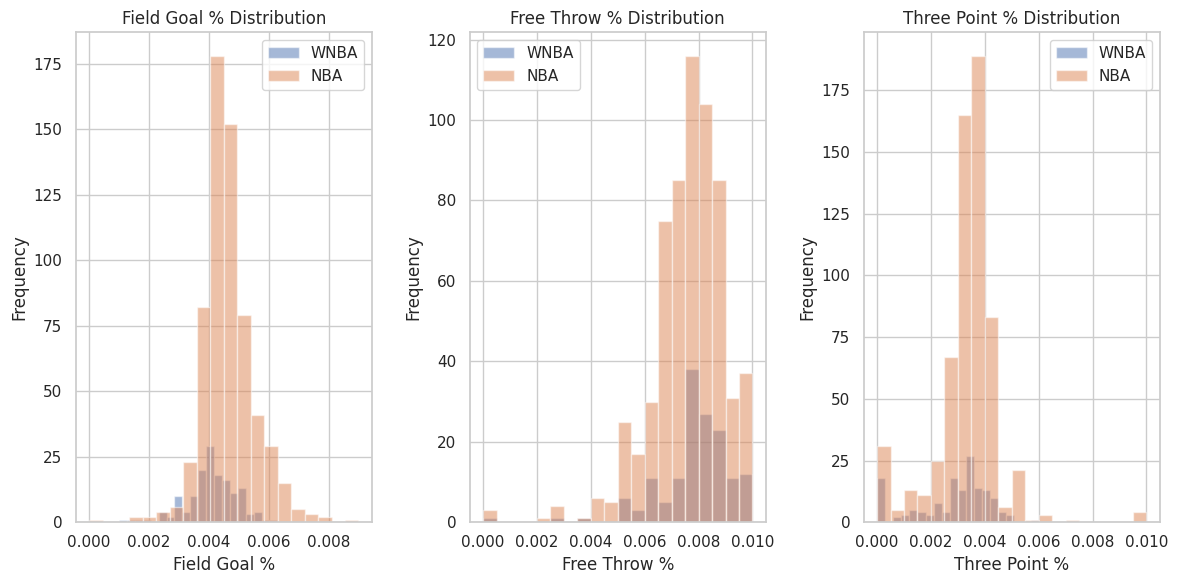

In [16]:
import pandas as pd

# URLs for the data
wnba_url = 'https://www.basketball-reference.com/wnba/years/2023_per_game.html'
nba_url = 'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'

# Function to scrape data
def scrape_data(url):
    tables = pd.read_html(url)
    return tables

# Scraping WNBA and NBA data
wnba_tables = scrape_data(wnba_url)
nba_tables = scrape_data(nba_url)

# Assuming the first table is the one we need for both
wnba_data = wnba_tables[0]
nba_data = nba_tables[0]

# Displaying the first few rows of the raw data
print("WNBA data first few rows:\n", wnba_data.head())
print("NBA data first few rows:\n", nba_data.head())

# Function to process data
def process_data(df, league):
    # Print the original columns
    print(f"\nOriginal {league} data columns:", df.columns)

    # Filter and rename relevant columns
    df = df[['Player', 'FG%', 'FT%', '3P%']]

    # Print the columns after filtering
    print(f"\nFiltered {league} data columns:", df.columns)

    # Remove any rows where 'Player' column value is 'Player'
    df = df[df['Player'] != 'Player']

    # Drop rows with missing values in the relevant columns
    df = df.dropna(subset=['FG%', 'FT%', '3P%'])

    # Remove rows where the percentages are not numeric
    df = df[df['FG%'].str.rstrip('%').apply(lambda x: x.replace('.', '', 1).isdigit())]
    df = df[df['FT%'].str.rstrip('%').apply(lambda x: x.replace('.', '', 1).isdigit())]
    df = df[df['3P%'].str.rstrip('%').apply(lambda x: x.replace('.', '', 1).isdigit())]

    # Debug: Print the first few rows before conversion
    print(f"\nFirst few rows of {league} data before conversion:\n", df.head())

    # Convert percentage strings to floats
    df['FG%'] = df['FG%'].str.rstrip('%').astype(float) / 100
    df['FT%'] = df['FT%'].str.rstrip('%').astype(float) / 100
    df['3P%'] = df['3P%'].str.rstrip('%').astype(float) / 100

    # Debug: Print the first few rows after conversion
    print(f"\nFirst few rows of {league} data after conversion:\n", df.head())

    return df

# Process the data
wnba_data = process_data(wnba_data, 'WNBA')
nba_data = process_data(nba_data, 'NBA')

# Display the processed data
print("\nFirst few rows of processed WNBA data:\n", wnba_data.head())
print("\nFirst few rows of processed NBA data:\n", nba_data.head())

import matplotlib.pyplot as plt

# Function to create plots
def create_plots(wnba_data, nba_data):
    # Debug: Print summary statistics before plotting
    print("\nWNBA FG% summary:\n", wnba_data['FG%'].describe())
    print("NBA FG% summary:\n", nba_data['FG%'].describe())
    print("WNBA FT% summary:\n", wnba_data['FT%'].describe())
    print("NBA FT% summary:\n", nba_data['FT%'].describe())
    print("WNBA 3P% summary:\n", wnba_data['3P%'].describe())
    print("NBA 3P% summary:\n", nba_data['3P%'].describe())

    plt.figure(figsize=(12, 6))

    # Plot FG%
    plt.subplot(1, 3, 1)
    plt.hist(wnba_data['FG%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['FG%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Field Goal %')
    plt.ylabel('Frequency')
    plt.title('Field Goal % Distribution')
    plt.legend()

    # Plot FT%
    plt.subplot(1, 3, 2)
    plt.hist(wnba_data['FT%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['FT%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Free Throw %')
    plt.ylabel('Frequency')
    plt.title('Free Throw % Distribution')
    plt.legend()

    # Plot 3P%
    plt.subplot(1, 3, 3)
    plt.hist(wnba_data['3P%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['3P%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Three Point %')
    plt.ylabel('Frequency')
    plt.title('Three Point % Distribution')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create the plots
create_plots(wnba_data, nba_data)



WNBA FG% summary:
 count    150.000000
mean       0.004087
std        0.000845
min        0.001000
25%        0.003710
50%        0.004095
75%        0.004638
max        0.006290
Name: FG%, dtype: float64
NBA FG% summary:
 count    625.000000
mean       0.004647
std        0.000859
min        0.000000
25%        0.004180
50%        0.004540
75%        0.005000
max        0.009000
Name: FG%, dtype: float64
WNBA FT% summary:
 count    150.000000
mean       0.007802
std        0.001435
min        0.000000
25%        0.007405
50%        0.007925
75%        0.008660
max        0.010000
Name: FT%, dtype: float64
NBA FT% summary:
 count    625.000000
mean       0.007590
std        0.001398
min        0.000000
25%        0.006920
50%        0.007700
75%        0.008460
max        0.010000
Name: FT%, dtype: float64
WNBA 3P% summary:
 count    150.000000
mean       0.002825
std        0.001389
min        0.000000
25%        0.002148
50%        0.003210
75%        0.003703
max        0.006000
Na

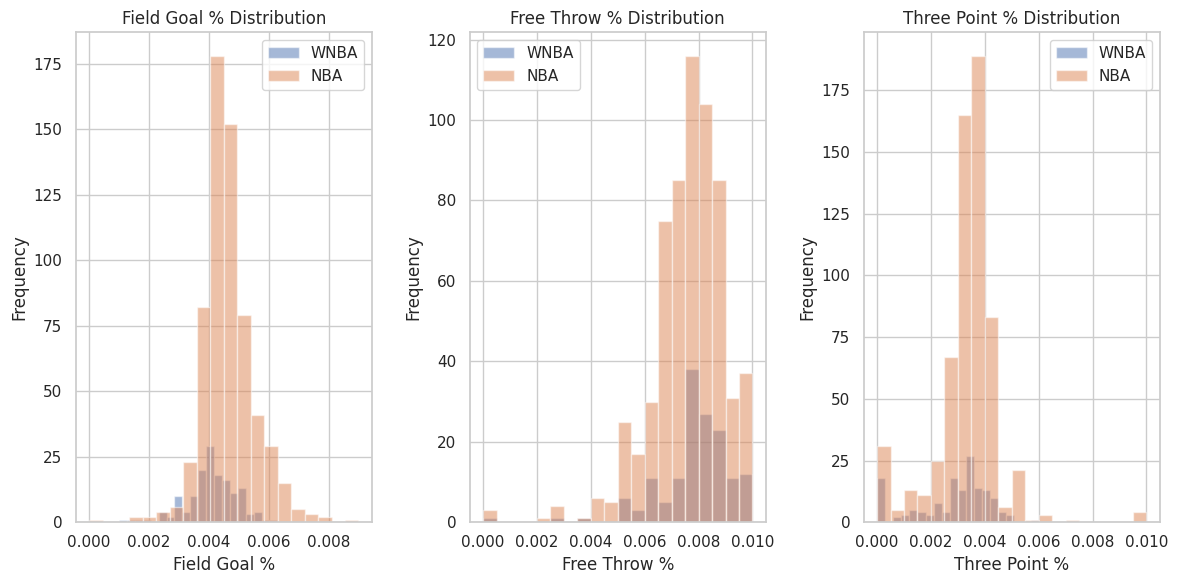

In [17]:
import matplotlib.pyplot as plt

# Function to create plots
def create_plots(wnba_data, nba_data):
    # Debug: Print summary statistics before plotting
    print("\nWNBA FG% summary:\n", wnba_data['FG%'].describe())
    print("NBA FG% summary:\n", nba_data['FG%'].describe())
    print("WNBA FT% summary:\n", wnba_data['FT%'].describe())
    print("NBA FT% summary:\n", nba_data['FT%'].describe())
    print("WNBA 3P% summary:\n", wnba_data['3P%'].describe())
    print("NBA 3P% summary:\n", nba_data['3P%'].describe())

    plt.figure(figsize=(12, 6))

    # Plot FG%
    plt.subplot(1, 3, 1)
    plt.hist(wnba_data['FG%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['FG%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Field Goal %')
    plt.ylabel('Frequency')
    plt.title('Field Goal % Distribution')
    plt.legend()

    # Plot FT%
    plt.subplot(1, 3, 2)
    plt.hist(wnba_data['FT%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['FT%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Free Throw %')
    plt.ylabel('Frequency')
    plt.title('Free Throw % Distribution')
    plt.legend()

    # Plot 3P%
    plt.subplot(1, 3, 3)
    plt.hist(wnba_data['3P%'], bins=20, alpha=0.5, label='WNBA')
    plt.hist(nba_data['3P%'], bins=20, alpha=0.5, label='NBA')
    plt.xlabel('Three Point %')
    plt.ylabel('Frequency')
    plt.title('Three Point % Distribution')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create the plots
create_plots(wnba_data, nba_data)
